# Lacmus to VisDrone2019 Object Detection converter

Lacmus annotations are VOC \*.xml formatted.   

VisDrone annotations are TXT files with one line per predicted object.It looks as follows:

bbox_left, bbox_top, bbox_width, bbox_height, score, object_category, truncation, occlusion

**bbox_left**	     The x coordinate of the top-left corner of the predicted bounding box

**bbox_top**	     The y coordinate of the top-left corner of the predicted object bounding box

**bbox_width**	     The width in pixels of the predicted object bounding box

**bbox_height**	     The height in pixels of the predicted object bounding box

**score**     The score in the DETECTION file indicates the confidence of the predicted bounding box enclosing 
                     an object instance.
                     The score in GROUNDTRUTH file is set to 1 or 0. 1 indicates the bounding box is considered in evaluation, 
                     while 0 indicates the bounding box will be ignored.
                      
**object_category**    The object category indicates the type of annotated object, (i.e., ignored regions(0), pedestrian(1), 
                     people(2), bicycle(3), car(4), van(5), truck(6), tricycle(7), awning-tricycle(8), bus(9), motor(10), 
                     others(11))
                      
**truncation**	     The score in the DETECTION result file should be set to the constant -1.
                     The score in the GROUNDTRUTH file indicates the degree of object parts appears outside a frame 
                     (i.e., no truncation = 0 (truncation ratio 0%), and partial truncation = 1 (truncation ratio 1% ~ 50%)).
                      
**occlusion**	     The score in the DETECTION file should be set to the constant -1.
                     The score in the GROUNDTRUTH file indicates the fraction of objects being occluded (i.e., no occlusion = 0 
                     (occlusion ratio 0%), partial occlusion = 1 (occlusion ratio 1% ~ 50%), and heavy occlusion = 2 
                     (occlusion ratio 50% ~ 100%)).

In [2]:
import os
import PIL
import numpy as np
import pandas as pd
from utils import *

VOC_DATA_DIR = 'data/LADDv4'
os.listdir(VOC_DATA_DIR)

['ImageSets', 'Annotations', 'JPEGImages']

In [3]:
with open(VOC_DATA_DIR+'/ImageSets/Main/train.txt') as f:
    train_i = f.read().split('\n')[:-1]

with open(VOC_DATA_DIR+'/ImageSets/Main/test.txt') as f:
    test_i = f.read().split('\n')[:-1]

test_idxs = [int(t) for t in test_i]
train_idxs = [int(t) for t in train_i]

In [4]:
CROP_SIZE = 640
WIDTH_CROPS = 6
HEIGHT_CROPS = 4
OUT_DATA_DIR = f'data/lacmus_visdrone_{CROP_SIZE}_{WIDTH_CROPS}_{HEIGHT_CROPS}_train'

if os.path.exists(OUT_DATA_DIR):
    os.system(f'rm -rf {OUT_DATA_DIR}')
os.mkdir(OUT_DATA_DIR)
    
image_dir = os.path.join(OUT_DATA_DIR, 'images')
annot_dir = os.path.join(OUT_DATA_DIR, 'annotations')
os.mkdir(image_dir)
os.mkdir(annot_dir)

def data_gen(idxs):
    for i in idxs:
        img, anns = load_img_and_annotations(i, VOC_DATA_DIR)
        crops = crop_sample(img, anns, CROP_SIZE, 4, WIDTH_CROPS, HEIGHT_CROPS)
        for img_crop, anno_crop in crops:
            if len(anno_crop) > 0:
                yield img_crop, anno_crop

data_iter = iter(data_gen(train_idxs))

In [5]:
for i, (img, annotations) in enumerate(data_iter):
    img_path = os.path.join(image_dir, f'{i}.jpg')
    img.save(img_path)
    save_annotations_to_file(i, annotations, annot_dir)        

### Check images and bboxes 

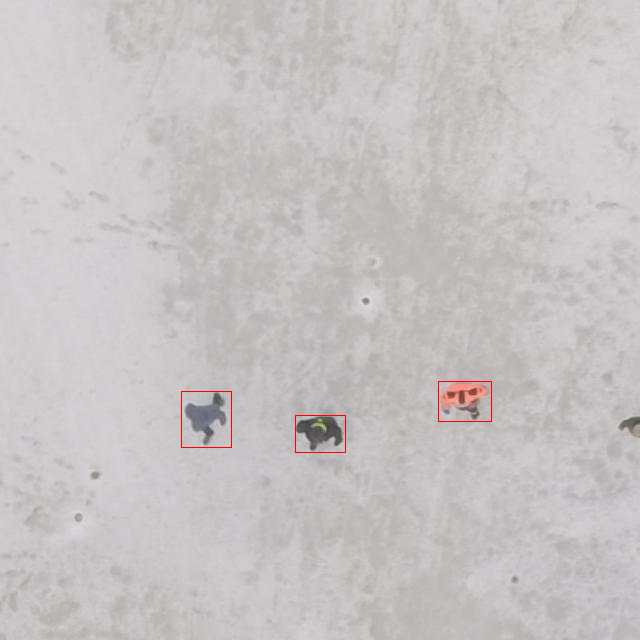

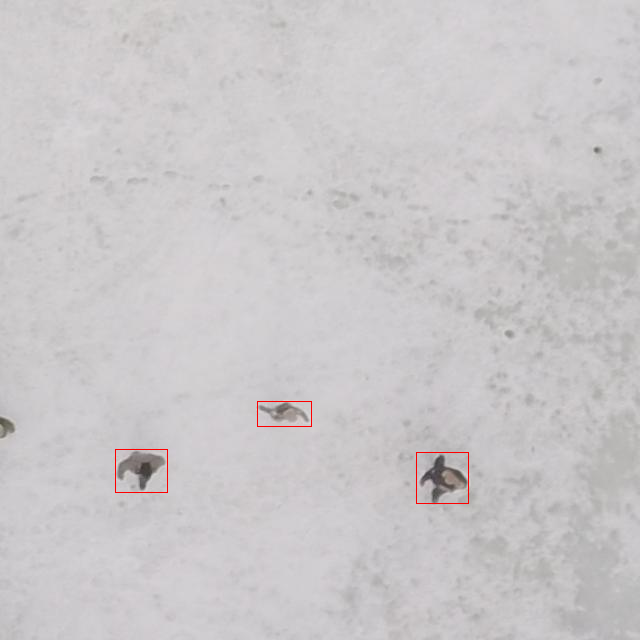

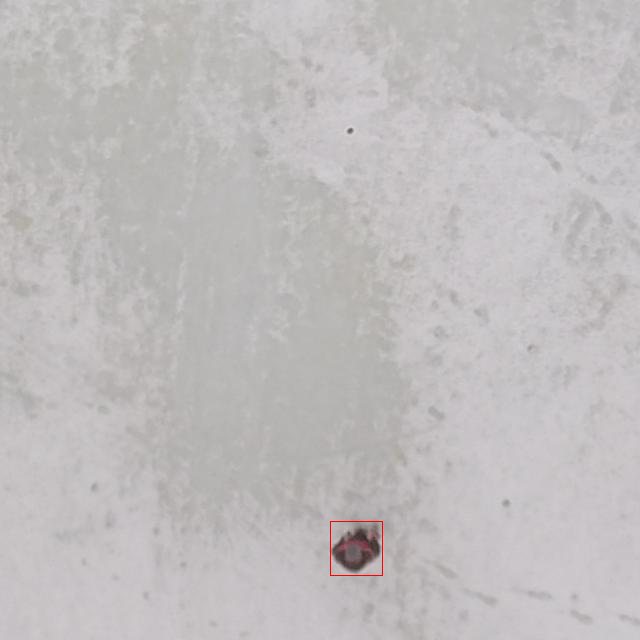

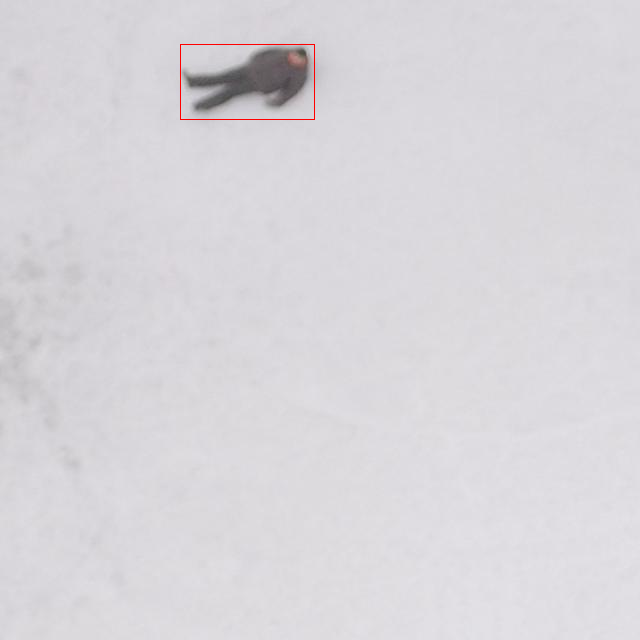

In [6]:
for i in range(4):
    display(draw_boxes(i, image_dir, annot_dir))